In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Dataset/creditcard.csv")

Mounted at /content/drive


In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:,1]


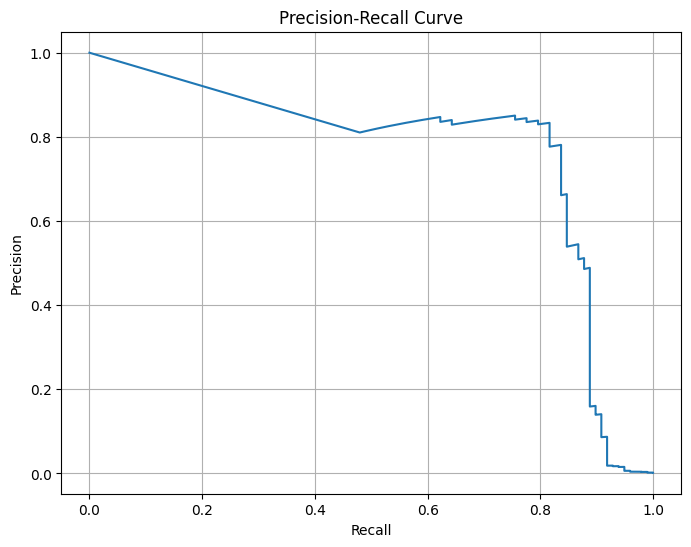

In [4]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


In [5]:
def evaluate_threshold(th):
    y_pred_th = (y_scores >= th).astype(int)
    print(f"\n====== Threshold: {th} ======")
    print(confusion_matrix(y_test, y_pred_th))
    print(classification_report(y_test, y_pred_th))

for th in [0.9, 0.7, 0.5, 0.3, 0.1, 0.05, 0.01]:
    evaluate_threshold(th)



====== Threshold: 0.9 ======
[[56598   266]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.89      0.39        98

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962


====== Threshold: 0.7 ======
[[56221   643]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962


====== Threshold: 0.5 ======
[[55475  1389]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98


Here 0.5 threshold is not used. Instead, plotted the precision-recall curve and evaluated multiple operating points. By analyzing the confusion matrices selected a threshold of 0.9 as a business-optimal compromise: it catches about 89% of fraud while only flagging around 266 legitimate transactions, which is operationally manageable. Lower thresholds only marginally increase recall but explode customer friction, which is not acceptable in a real system.